## Principel Component Analysis (PCA)

PCA is a mathematical technique to reduce redundancy in the data

PCA is one of the well-known algorithm for Dimensionality Reduction

## PCA Visualization

http://setosa.io/ev/principal-component-analysis/

## Activity: are the countries in great UK different in terms of food?

In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.

It would be great if we represent diffrence among UK countries based on the food they eat visually 

[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]


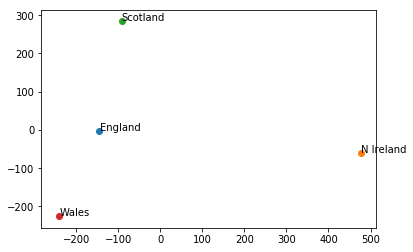

In [33]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing


df = pd.read_excel('pca_uk.xlsx')

X = np.array([df[i].values for i in df.columns if i != 'Features'])

# print(X)

pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print(X_r)
for k, (i,j) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
    plt.scatter(i, j)
    plt.text(i+0.3, j+0.3, df.columns[:-1][k])

plt.show()

## Activity: PCA Steps

Follow the steps here and write a function that computes the principle component for iris dataset 

https://sebastianraschka.com/Articles/2014_pca_step_by_step.html

Steps: 

1- Subtract column mean from feature matrix

2- Calculate the covariance of centered matrix

3- Calculate the eigenvalue and eigenvector of covariance matrix

4- Return the first K (two for example) column of matrix multiplication of centerned matrix with eigenvector matrix


Compare the result of custom function with PCA in sklearn

Calculate the correlation of the first two principle component 

How much of the dataset information is preserved in the first two components?

Hint: use `pca.explained_variance_ratio_`


In [3]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats


iris = datasets.load_iris()

X = iris.data
y = iris.target

# PCA computation by sklearn
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

print('Correlation of PCA Component:')
print(scipy.stats.pearsonr(X_r[:, 0], X_r[:, 1]))

# our function to comapre 
def PCA_calculation(data, n_comp=2):
    M = np.mean(data, axis=0)
    # center columns by subtracting column means
    C = X - M
    # calculate covariance matrix of centered matrix
    V = np.cov(C.T)
    # eigendecomposition of covariance matrix
    eig_value, eig_vector = np.linalg.eig(V)
    print(eig_vector)
    print(eig_value)
    P = np.dot(C, eig_vector)[:, :n_comp]
    return P


PCA_calculation(X, 2)

[4.22484077 0.24224357]
[0.92461621 0.05301557]
[0.92461621 0.97763178]
Correlation of PCA Component:
(-2.3569080325843714e-17, 1.0)
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]
[4.22484077 0.24224357 0.07852391 0.02368303]


array([[-2.68420713, -0.32660731],
       [-2.71539062,  0.16955685],
       [-2.88981954,  0.13734561],
       [-2.7464372 ,  0.31112432],
       [-2.72859298, -0.33392456],
       [-2.27989736, -0.74778271],
       [-2.82089068,  0.08210451],
       [-2.62648199, -0.17040535],
       [-2.88795857,  0.57079803],
       [-2.67384469,  0.1066917 ],
       [-2.50652679, -0.65193501],
       [-2.61314272, -0.02152063],
       [-2.78743398,  0.22774019],
       [-3.22520045,  0.50327991],
       [-2.64354322, -1.1861949 ],
       [-2.38386932, -1.34475434],
       [-2.6225262 , -0.81808967],
       [-2.64832273, -0.31913667],
       [-2.19907796, -0.87924409],
       [-2.58734619, -0.52047364],
       [-2.3105317 , -0.39786782],
       [-2.54323491, -0.44003175],
       [-3.21585769, -0.14161557],
       [-2.30312854, -0.10552268],
       [-2.35617109,  0.03120959],
       [-2.50791723,  0.13905634],
       [-2.469056  , -0.13788731],
       [-2.56239095, -0.37468456],
       [-2.63982127,